<a href="https://colab.research.google.com/github/kaanbaycan/IE-423-Forecasting-Tasks/blob/main/IE_423_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
def upload_dataset(from_drive = False):
  if not os.path.exists("kaggle.json"):
    if not from_drive:
      print("Upload Kaggle API Key")
      files.upload()
      print("Downloading dataset...")
    else:
      !cp /content/drive/MyDrive/kaggle.json /content/
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d prepinstaprime/black-friday-sales-data
    !unzip black-friday-sales-data.zip
  else:
    print("Dataset already exists")

In [3]:
upload_dataset()

Dataset already exists


In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# EDA

* Our target variable is **Purchase** which is integer typed continous variable
* We have 12 columns including the target column
* We have 550k data points with some null values at some features

## Univariate Analysis

In [7]:
#We start with basic statistics for both numeric and categorical data
def unistats(dataframe,sorted="Missing"):
    """"
    Takes dataframe and sorted as parameter
    Returns count, missing, unique, dtype, mode and other stats"""
    pd.set_option("display.max_rows",100)
    pd.set_option("display.max_columns",100)
    output_df = pd.DataFrame(columns = ["Count","Missing","Unique", "Dtype", "Mode", "Mean", "Min", "25%", "Median", "75%", "Max", "Std", "Skew", "Kurt"])

    for col in dataframe:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            output_df.loc[col] =[dataframe[col].count() ,dataframe[col].isnull().sum() ,dataframe[col].nunique() ,dataframe[col].dtype ,dataframe[col].mode().values[0], dataframe[col].mean(), dataframe[col].min(), dataframe[col].quantile(0.25), dataframe[col].median(), dataframe[col].quantile(0.75),dataframe[col].max(), dataframe[col].std(), dataframe[col].skew(),dataframe[col].kurt()]
        else:
            output_df.loc[col] =[dataframe[col].count() ,dataframe[col].isnull().sum() ,dataframe[col].nunique() ,dataframe[col].dtype , "-", "-", "-","-", "-", "-","-", "-", "-","-"]


    return output_df.sort_values(by = ["Dtype",sorted])
unistats(df)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
User_ID,550068,0,5891,int64,1001680,1003028.842401,1000001,1001516.0,1003077.0,1004478.0,1006040,1727.591586,0.003066,-1.195501
Occupation,550068,0,21,int64,4,8.076707,0,2.0,7.0,14.0,20,6.52266,0.40014,-1.216114
Marital_Status,550068,0,2,int64,0,0.409653,0,0.0,0.0,1.0,1,0.49177,0.367437,-1.864997
Product_Category_1,550068,0,20,int64,5,5.40427,1,1.0,5.0,8.0,20,3.936211,1.025735,1.234757
Purchase,550068,0,18105,int64,7011,9263.968713,12,5823.0,8047.0,12054.0,23961,5023.065394,0.60014,-0.338378
Product_Category_2,376430,173638,17,float64,8.0,9.842329,2.0,5.0,9.0,15.0,18.0,5.08659,-0.162758,-1.432267
Product_Category_3,166821,383247,15,float64,16.0,12.668243,3.0,9.0,14.0,16.0,18.0,4.125338,-0.765446,-0.808066
Product_ID,550068,0,3631,object,-,-,-,-,-,-,-,-,-,-
Gender,550068,0,2,object,-,-,-,-,-,-,-,-,-,-
Age,550068,0,7,object,-,-,-,-,-,-,-,-,-,-


###Observations
Features w/out missing data
* UserID is duplicated hence users shopped more than once
* Occupation(meslek) has 21 different values and masked
* Marital Status is binary and 40% seems to be unmarried
* Product_Category_1 has 20 different values with mean value 5.4
* Product_ID is again duplicated meaning some products are bought more than once
* Gender has 2 values F or M, I will one-hot-encode
* Age is not spesifically given as integer, rather a range is given
* City Category is not told explicitly in Kaggle but seems okey with 3 values
* Stay_in_current_city_years again has ranges

Features with missing data
* Product Category 2 and 3 has missing data, we should look into it

In [8]:
#Lets start with missing data
df[df["Product_Category_2"].isnull()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [9]:
df[df["Product_Category_3"].isnull()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


In [10]:
df[df["Product_Category_2"].isnull() & df["Product_Category_3"].isnull()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


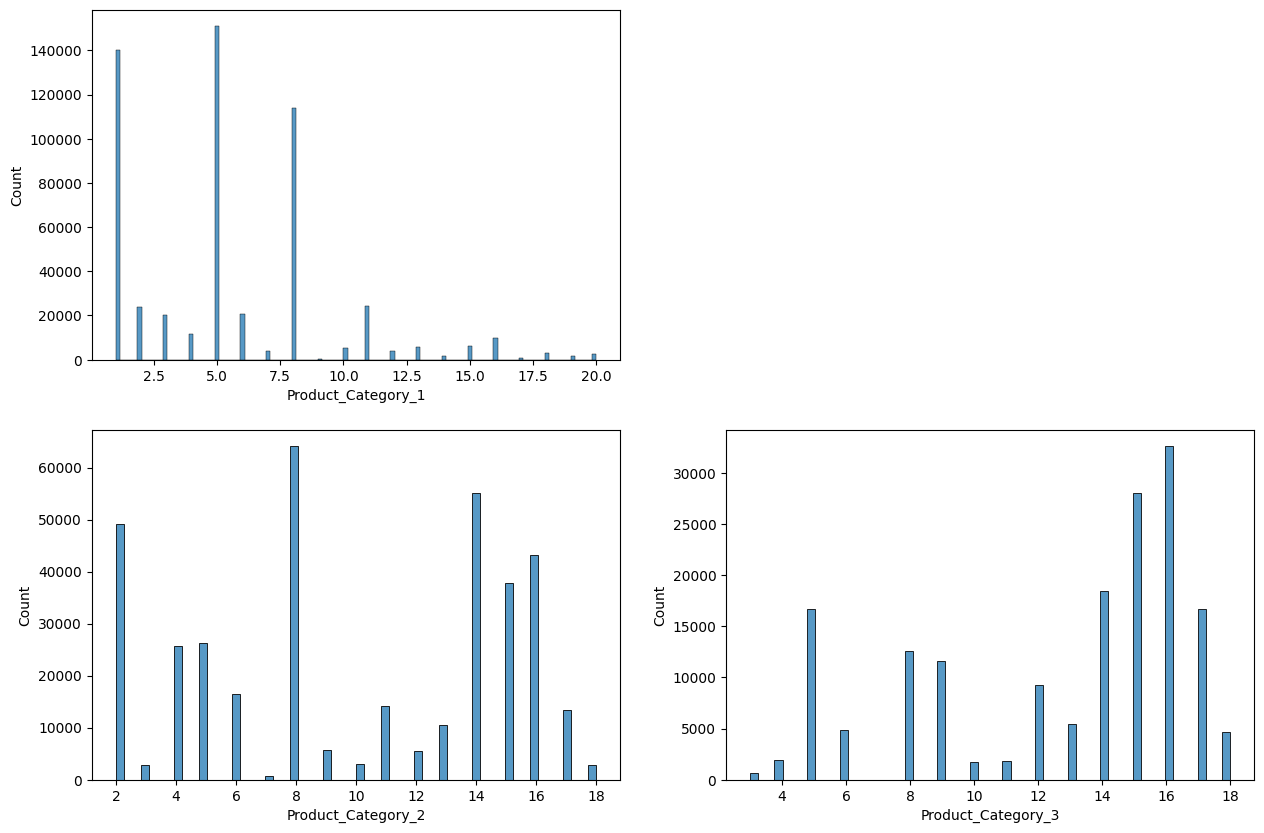

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Product_Category_1"])
plt.subplot(2,2,3)
sns.histplot(df["Product_Category_2"])
plt.subplot(2,2,4)
sns.histplot(df["Product_Category_3"]);

If we look at the datacard at kaggle, we may understand the missing values. Product category 1 is the original category of the product, but category 2 and 3 are if the product belongs to some other category as well stats. Hence, NAN means that the product belongs only to one category. As a result I will fill the missing value at cat2 and cat3 as 0.

In [12]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(0)
df["Product_Category_3"] = df["Product_Category_3"].fillna(0)

* We got rid of the nan values with 0 imputation

Now, lets deal with the categorical columns: Age, Gender, City Category, Year at Current City

<Axes: xlabel='Age', ylabel='Count'>

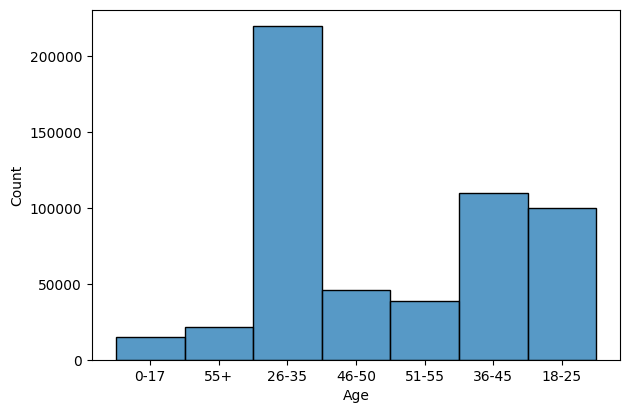

In [13]:
#Visualize the Age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Age"])

* Here we see that nearly half of the purchase comes from middle-aged customers
* After bivariate analysis, we can group some ranges and decrease the number of categories

<Axes: xlabel='Gender', ylabel='Count'>

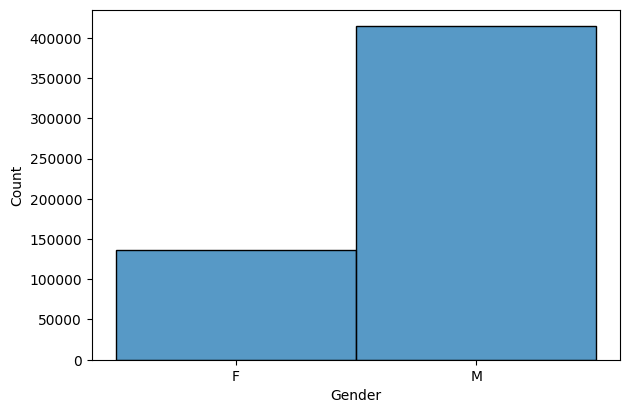

In [14]:
#Visualize Gender
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Gender"])

* Surprising result is that males tend to shop more

<Axes: xlabel='City_Category', ylabel='Count'>

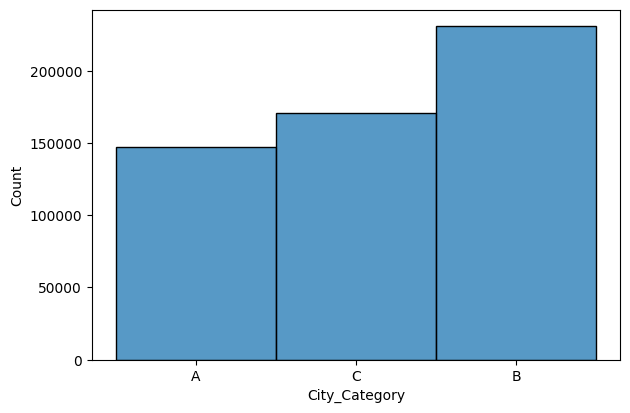

In [15]:
#Visualize City Category
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["City_Category"])

* Seems good in terms of distribution

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Count'>

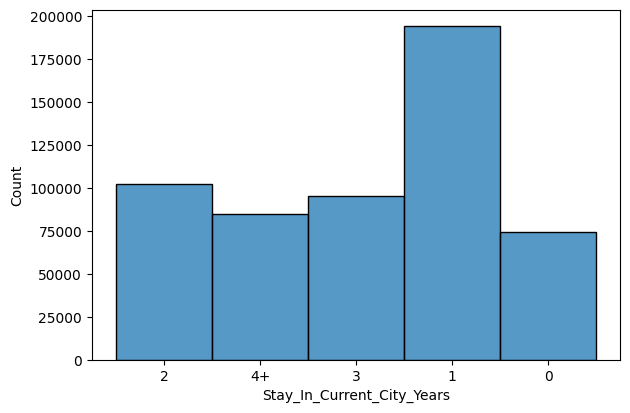

In [16]:
#Visualize Lived Current City
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["Stay_In_Current_City_Years"])

* Again, similar values for each bin

Now, lets move on to numeric features: User id, product id, occupation, marital stat, product category 1, product category 2, product category 3, purchase

<Axes: xlabel='User_ID', ylabel='Count'>

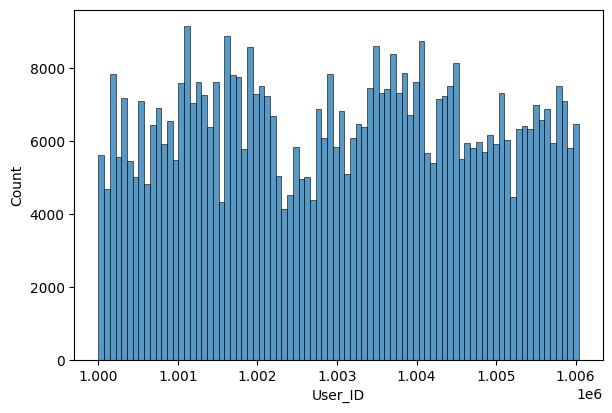

In [17]:
#Lets visualize user id
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df["User_ID"])

This much variablity in the x axis is not desired. Hence I will try to cluster the user id's as most, mid and low buyers

In [18]:
#Cluster user_id's
df["User_ID"] = df["User_ID"].astype(str)

In [19]:
#look at the total purhcase by user id
user_purchase = df.groupby("User_ID")["Purchase"].sum()
user_purchase.sort_values(ascending=False)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
             ...   
1004991       52371
1005117       49668
1003883       49349
1000094       49288
1004464       46681
Name: Purchase, Length: 5891, dtype: int64

<Axes: xlabel='Purchase', ylabel='Count'>

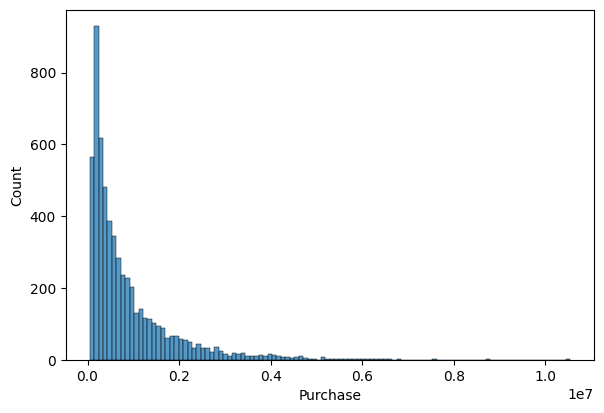

In [20]:
#Lets try to visualize and cluster
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(user_purchase)

In [21]:
#Getting the quantiles to cluster existing users
quantiles = user_purchase.quantile([0.25,0.5,0.75])
quantiles

0.25     237678.0
0.50     521213.0
0.75    1119249.5
Name: Purchase, dtype: float64

In [22]:
#Get the users within their quantiles
low = user_purchase[user_purchase < quantiles[0.25]].index
mid = user_purchase[(user_purchase >= quantiles[0.25]) & (user_purchase < quantiles[0.5])].index
high = user_purchase[user_purchase >= quantiles[0.75]].index

In [23]:
df_users = pd.DataFrame(columns = ["User_ID","User_Cluster"])
df_users["User_ID"] = df["User_ID"].unique()
df_users["User_Cluster"] = "Low"
df_users.loc[df_users["User_ID"].isin(high),"User_Cluster"] = "High"
df_users.loc[df_users["User_ID"].isin(mid),"User_Cluster"] = "Mid"

In [24]:
df_users.head()

,User_ID,User_Cluster
0,1000001,Mid
1,1000002,Low
2,1000003,Mid
3,1000004,Low
4,1000005,Low


Here we have another table for existing users related to their purchase amounts

In [25]:
#Lets look at the prod. categories
df.groupby("Product_Category_1")["Purchase"].sum().sort_values(ascending=False)

Product_Category_1
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
7       60896731
4       27380488
14      20014696
18       9290201
9        6370324
17       5878699
12       5331844
13       4008601
20        944727
19         59378
Name: Purchase, dtype: int64

In [26]:
#Again 20 category is too much, I will cluster it into 3, top selling, average, not selling
quantiles = df.groupby("Product_Category_1")["Purchase"].sum().quantile([0.25,0.5,0.75])
quantiles
categories = df.groupby("Product_Category_1")["Purchase"].sum()
top_selling = categories[categories > quantiles[0.75]].index
average = categories[(categories >= quantiles[0.5]) & (categories < quantiles[0.75])].index
not_selling = categories[categories < quantiles[0.5]].index

In [27]:
df_categories = pd.DataFrame(columns = ["Product_Category_1","Cluster"])
df_categories["Product_Category_1"] = df["Product_Category_1"].unique()
df_categories["Cluster"] = "Not Selling"
df_categories.loc[df_categories["Product_Category_1"].isin(top_selling),"Cluster"] = "Top Selling"
df_categories.loc[df_categories["Product_Category_1"].isin(average),"Cluster"] = "Average"

In [28]:
df_categories.head(20)

,Product_Category_1,Cluster
0,3,Average
1,1,Top Selling
2,12,Not Selling
3,8,Top Selling
4,5,Top Selling
5,4,Not Selling
6,2,Top Selling
7,6,Top Selling
8,14,Not Selling
9,11,Average


We have another table for product categories now.

In [29]:
#Lets drop product id column
df = df.drop("Product_ID",axis=1)

<Axes: xlabel='Marital_Status', ylabel='Count'>

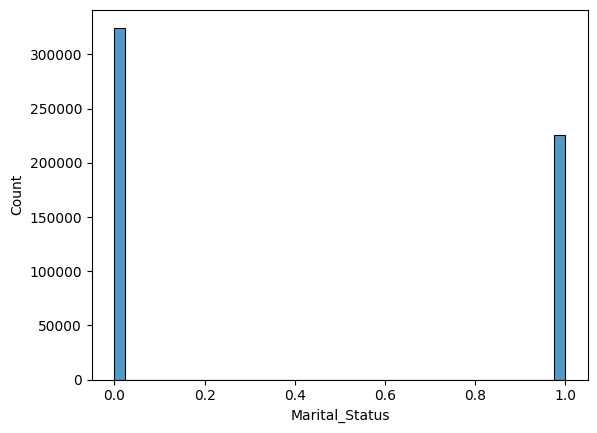

In [30]:
#Lets look at the marital status
sns.histplot(df["Marital_Status"])

<Axes: xlabel='Purchase', ylabel='Count'>

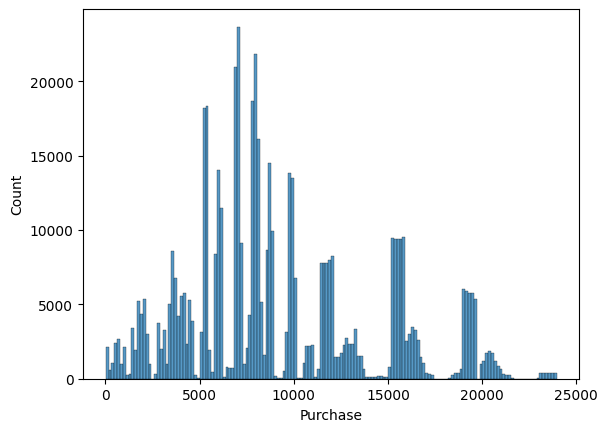

In [31]:
#Lastly lets look at the purchases
sns.histplot(df["Purchase"])

In [32]:
#lets apply a shapiro test to see if purchase is distributed normally
from scipy.stats import shapiro
shapiro(df["Purchase"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.952629029750824, pvalue=0.0)

As Shapiro test suggests, purchase is distributed normally

<Axes: ylabel='Purchase'>

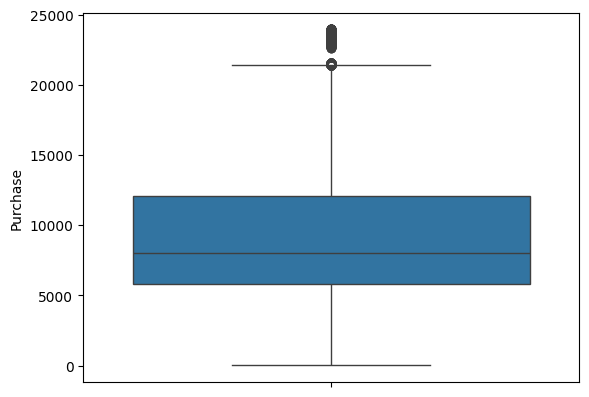

In [33]:
#Lets look at the outliers
sns.boxplot(df["Purchase"])

In [34]:
#lets look at the outliers
df[df["Purchase"] > df["Purchase"].quantile(1-0.01)].count()

User_ID                       5492
Gender                        5492
Age                           5492
Occupation                    5492
City_Category                 5492
Stay_In_Current_City_Years    5492
Marital_Status                5492
Product_Category_1            5492
Product_Category_2            5492
Product_Category_3            5492
Purchase                      5492
dtype: int64

In [35]:
#I dont like outliers
df = df[df["Purchase"] < df["Purchase"].quantile(1-0.01)]

<Axes: ylabel='Purchase'>

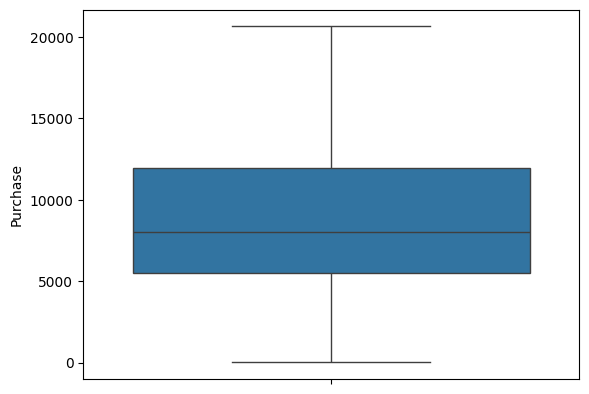

In [36]:
sns.boxplot(df["Purchase"])

Much better :)

## Bivariate Statistics

In [37]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,M,55+,16,C,4+,0,8,0.0,0.0,7969


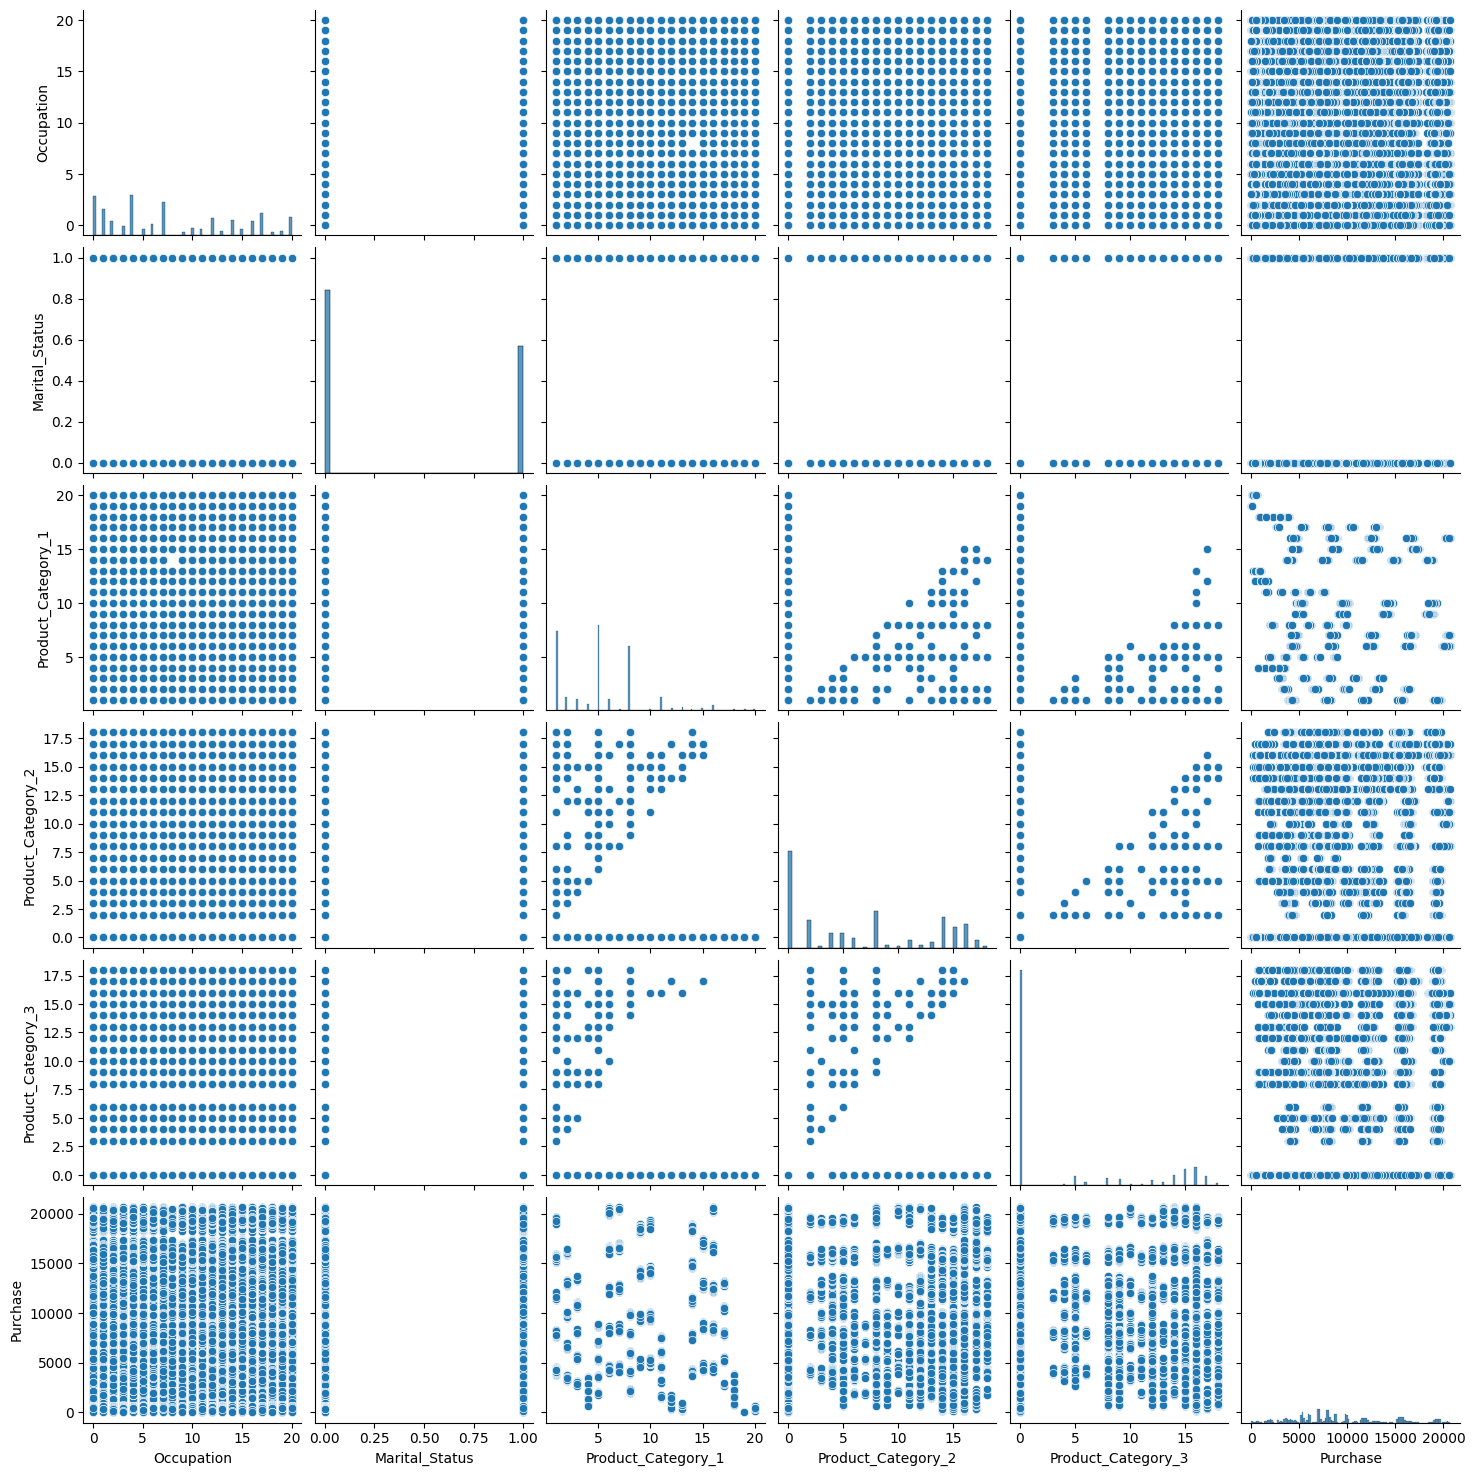

In [38]:
#Lets look at pairplot
sns.pairplot(df)

In [39]:
#Lets make an anova test to see if this much category is needed
def barplots(dataframe, label, target):
    from scipy import stats
    """
    Takes dataframe, feature and target as parameter
    Applies t-tests for categorical features
    Returns a barpot with t-stat and p values"""
    ttests = []
    string = "Categories  t stat  p value \n "
    if pd.api.types.is_numeric_dtype(dataframe[label]) == False and len(dataframe[label].unique()) <= 20 and len(dataframe[label].unique())>=2:
        e_types = dataframe[label].unique()
        for i, e in enumerate(e_types):
            for i2, e2 in enumerate(e_types):
                if i2 >= i :
                    g1 = dataframe[dataframe[label] == e][target]
                    g2 = dataframe[dataframe[label] == e2][target]
                    t, p = stats.ttest_ind(g1,g2)
                    ttests.append([f"{e} - {e2}", t, p])
                    string += (f"{e} - {e2}: {t:.4f}, {p:.5f} " + " \n ")
                    if p < 0.05:
                        string += "Significant" + "\n"
                    else:
                        string += "Not Significant" + "\n"
        plt.figure()
        plt.figsize=(10,6)
        plt.text(5, 0.1, string, fontsize = 8)
        viz = sns.barplot(data = dataframe, x = label , y = target,)
        viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)
        viz.set(title = f"{target} by {label}")
        plt.show()

<ipython-input-39-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


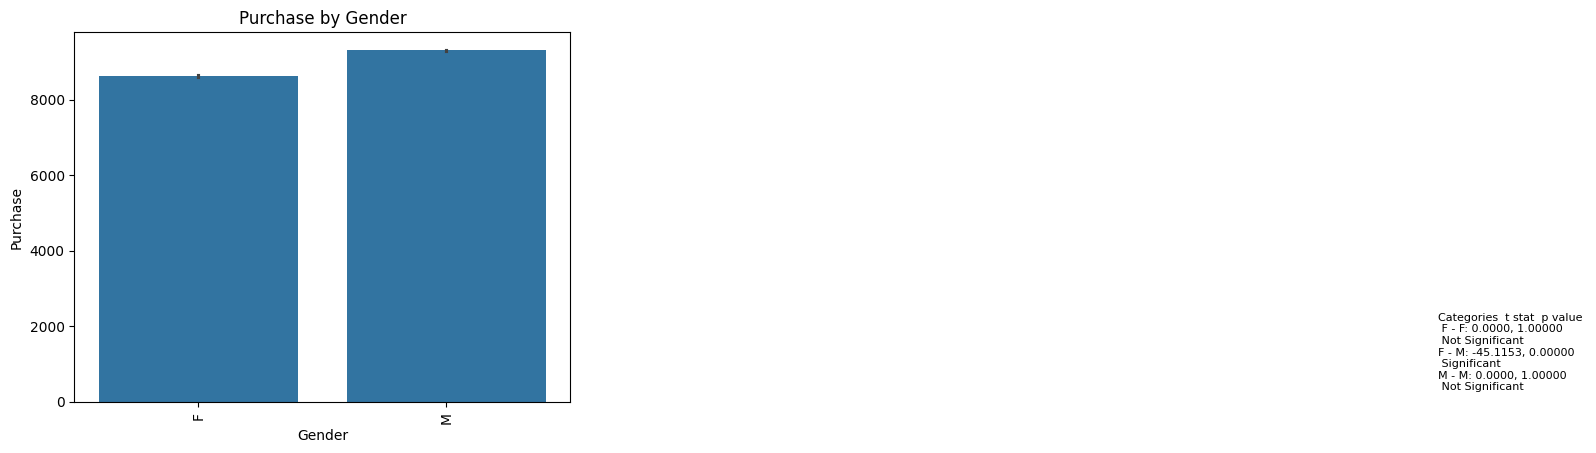

In [40]:
barplots(df, "Gender", "Purchase")

t test suggests a significance although barplot does not seem very different

<ipython-input-39-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


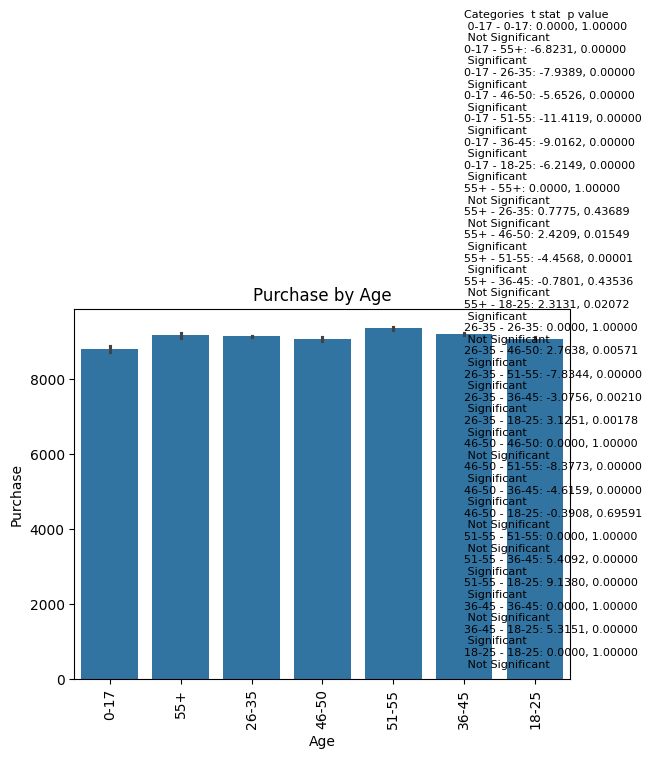

In [41]:
barplots(df, "Age", "Purchase")

We also observe significance between 2 age bins mostly.
* 55+ has no significance among the others

In [42]:
group_1 = ["0-17","46-50"]
group_2 = ["55+","26-35","36-45"]
group_3 = ["51-55"]
group_4 = ["18-25"]

In [43]:
df["Age_Group"] = "NaN"

In [44]:
df.loc[df["Age"].isin(group_1),"Age_Group"] = "Group 1"
df.loc[df["Age"].isin(group_2),"Age_Group"] = "Group 2"
df.loc[df["Age"].isin(group_3),"Age_Group"] = "Group 3"
df.loc[df["Age"].isin(group_4),"Age_Group"] = "Group 4"

In [45]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Group
0,1000001,F,0-17,10,A,2,0,3,0.0,0.0,8370,Group 1
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200,Group 1
2,1000001,F,0-17,10,A,2,0,12,0.0,0.0,1422,Group 1
3,1000001,F,0-17,10,A,2,0,12,14.0,0.0,1057,Group 1
4,1000002,M,55+,16,C,4+,0,8,0.0,0.0,7969,Group 2


<ipython-input-39-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


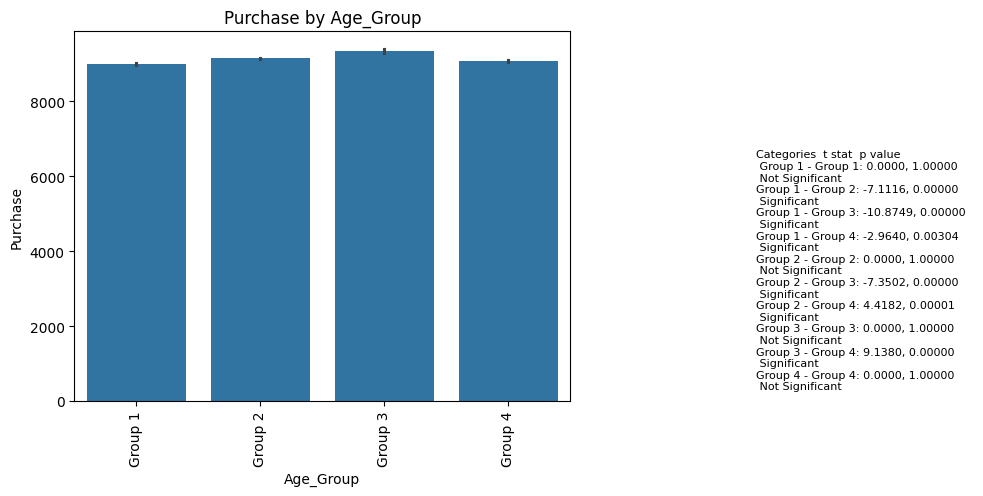

In [46]:
barplots(df, "Age_Group", "Purchase")

Now all of the features are significant

<ipython-input-39-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


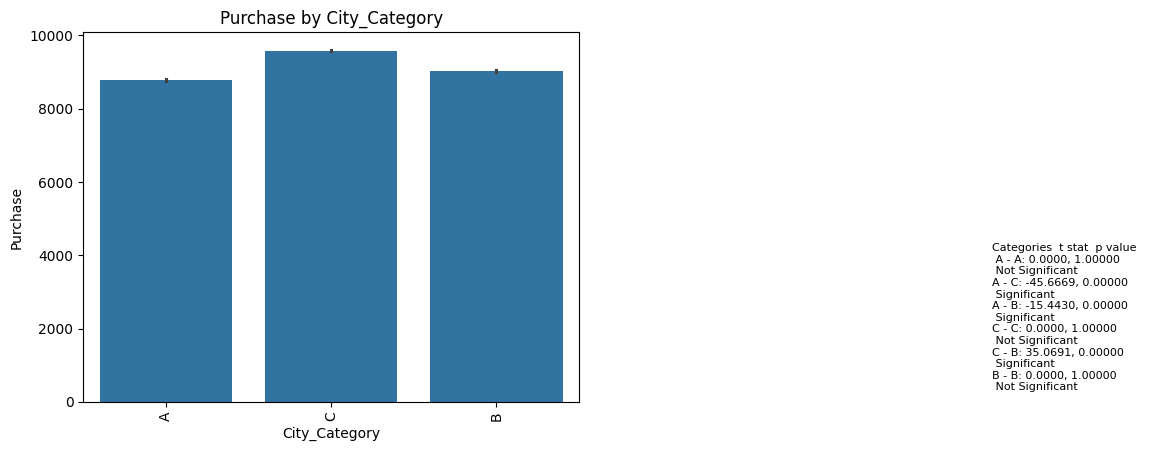

In [47]:
barplots(df, "City_Category", "Purchase")

t tests suggests city category has significant effect on purchase

<ipython-input-39-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


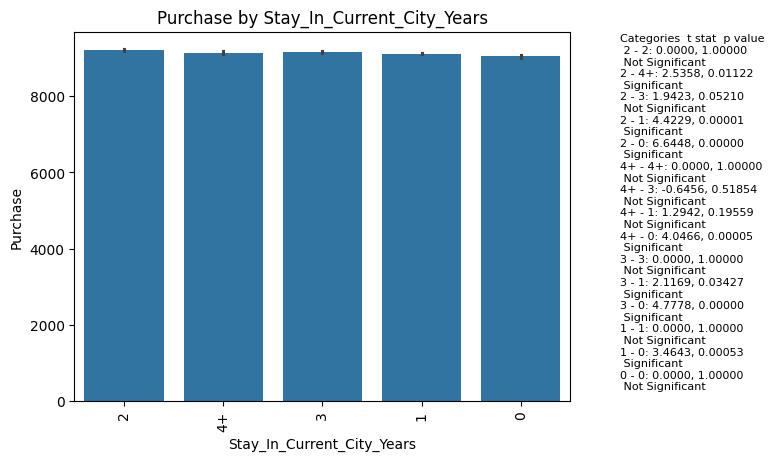

In [48]:
barplots(df, "Stay_In_Current_City_Years", "Purchase")

In [49]:
#Again I will group according to t scores
group_1 = ["2","3"]
group_2 = ["1","4+"]
group_3 =["0"]

In [50]:
df["Stay_In_Current_City_Group"] = "nan"
df.loc[df["Stay_In_Current_City_Years"].isin(group_1),"Stay_In_Current_City_Group"] = "group_1"
df.loc[df["Stay_In_Current_City_Years"].isin(group_2),"Stay_In_Current_City_Group"] = "group_2"
df.loc[df["Stay_In_Current_City_Years"].isin(group_3),"Stay_In_Current_City_Group"] = "group_3"

<ipython-input-39-8bf59eebb334>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


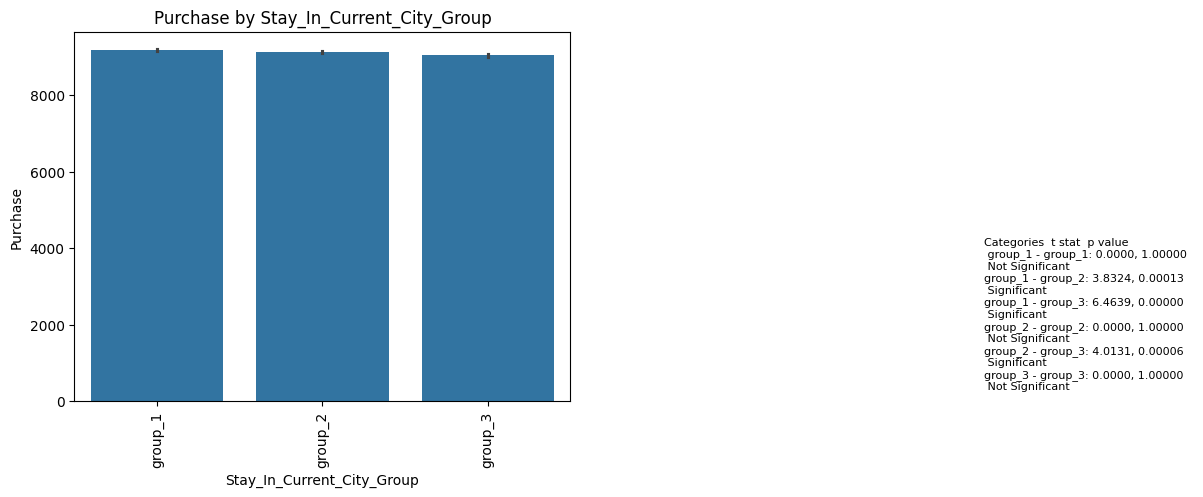

In [51]:
barplots(df, "Stay_In_Current_City_Group", "Purchase")

Seems better

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544565 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     544565 non-null  object 
 1   Gender                      544565 non-null  object 
 2   Age                         544565 non-null  object 
 3   Occupation                  544565 non-null  int64  
 4   City_Category               544565 non-null  object 
 5   Stay_In_Current_City_Years  544565 non-null  object 
 6   Marital_Status              544565 non-null  int64  
 7   Product_Category_1          544565 non-null  int64  
 8   Product_Category_2          544565 non-null  float64
 9   Product_Category_3          544565 non-null  float64
 10  Purchase                    544565 non-null  int64  
 11  Age_Group                   544565 non-null  object 
 12  Stay_In_Current_City_Group  544565 non-null  object 
dtypes: float64(2), int6

In [53]:
#lets also add the user cluster and product category cluster
df_new = df.merge(df_users, on = "User_ID", how = "left")


In [54]:
df_new = df_new.merge(df_categories, on = "Product_Category_1", how = "left")

In [55]:
#Drop age, stay_in_current_City, product_category_1
df_new = df_new.drop(["Age","Stay_In_Current_City_Years","Product_Category_1"],axis=1)

In [56]:
#Lets one_hot_encode
df_new_dummied = pd.get_dummies(df_new, columns = ["Gender","User_Cluster","Cluster","Occupation","Marital_Status","City_Category","Age_Group","Stay_In_Current_City_Group"],dtype=int)

In [57]:
df_new_dummied.drop("User_ID",axis=1,inplace=True)

In [58]:
#Lets fit a linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(df_new_dummied.drop("Purchase",axis=1), df_new_dummied["Purchase"], test_size=0.2, random_state=42)

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [61]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

In [62]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [63]:
print("Training Score: ", pipe.score(X_train, y_train))
print("Testing Score: ", pipe.score(X_test, y_test))

Training Score:  0.1725618024330483
Testing Score:  0.16839510896506604


In [64]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, pipe.predict(X_test))}")

Mean Absolute Error: 3462.666046826594


In [65]:
#Lets fit a xgboost
from xgboost import XGBRegressor


In [66]:
model = XGBRegressor()

In [67]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
print("Training Score: ", model.score(X_train, y_train))
print("Testing Score: ", model.score(X_test, y_test))
print("MAE:",mean_absolute_error(y_test,model.predict(X_test)))

Training Score:  0.39567189955140414
Testing Score:  0.3811638392654121
MAE: 2905.346586569998


In [84]:
#Lets also model with df
df_basic = pd.get_dummies(df, columns = ["Age","Gender","Occupation","Marital_Status","City_Category","Stay_In_Current_City_Years"],dtype=int)

In [85]:
df_basic.drop(["User_ID","Age_Group","Stay_In_Current_City_Group"],axis=1,inplace=True)

In [86]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544565 entries, 0 to 550067
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product_Category_1             544565 non-null  int64  
 1   Product_Category_2             544565 non-null  float64
 2   Product_Category_3             544565 non-null  float64
 3   Purchase                       544565 non-null  int64  
 4   Age_0-17                       544565 non-null  int64  
 5   Age_18-25                      544565 non-null  int64  
 6   Age_26-35                      544565 non-null  int64  
 7   Age_36-45                      544565 non-null  int64  
 8   Age_46-50                      544565 non-null  int64  
 9   Age_51-55                      544565 non-null  int64  
 10  Age_55+                        544565 non-null  int64  
 11  Gender_F                       544565 non-null  int64  
 12  Gender_M                       5445

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df_basic.drop("Purchase",axis=1), df_basic["Purchase"], test_size=0.2, random_state=42)

In [88]:
model = XGBRegressor()

In [89]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [91]:
print("MAE:",mean_absolute_error(y_test,model.predict(X_test)))
print("Mean value of purchase",df["Purchase"].mean())

MAE: 2115.7084770323913
Mean value of purchase 9134.72945745687
